In [6]:
pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 989.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.2/39.2 MB 3.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from subprocess import check_output
print(check_output(["ls", "/Users/apple/Documents/WS/AI_workShop/myenv/CNN/fashion-mnist/data/fashion"]).decode("utf8"))
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

conv.py
mnist_test.csv
mnist_train.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte



2024-06-29 23:16:09.777791: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
train_df = pd.read_csv('/Users/apple/Documents/WS/AI_workShop/myenv/CNN/fashion-mnist/data/fashion/mnist_train.csv',sep=',')
test_df = pd.read_csv('/Users/apple/Documents/WS/AI_workShop/myenv/CNN/fashion-mnist/data/fashion/mnist_test.csv', sep = ',')

In [9]:
train_df.head()

,9,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
0,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,133,167,73,0,0,0


In [10]:
test_df.head()

,9,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516
0,2,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,164,58,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,6,0,0,0,2,0,1,1,0,0,...,71,12,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,145,129,62,0,0,0,0,0,0,0


In [11]:
train_data = np.array(train_df, dtype = 'float32')

In [12]:
test_data = np.array(test_df, dtype='float32')

In [13]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [14]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

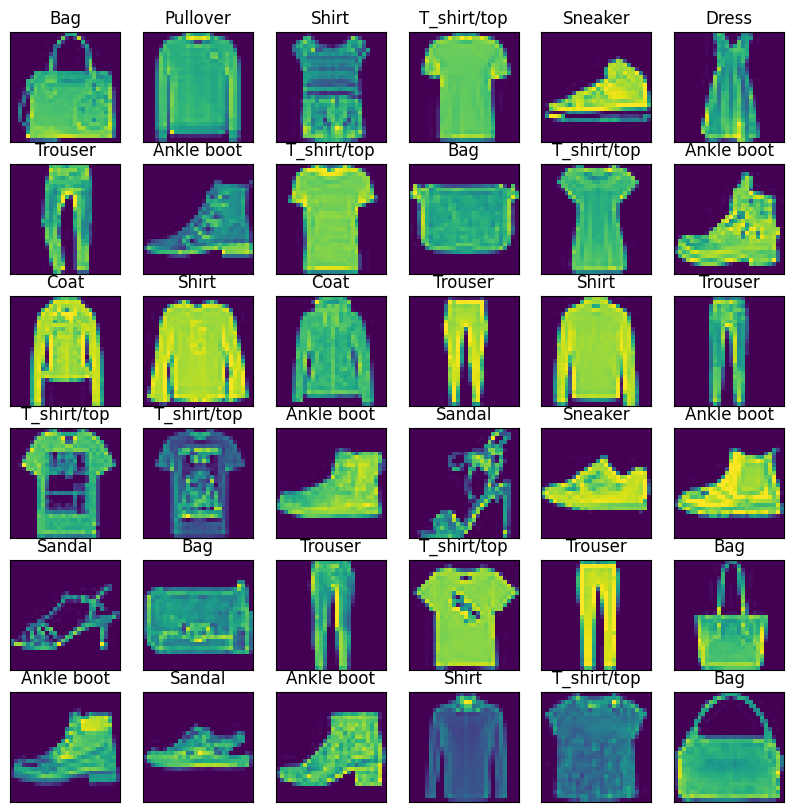

In [15]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

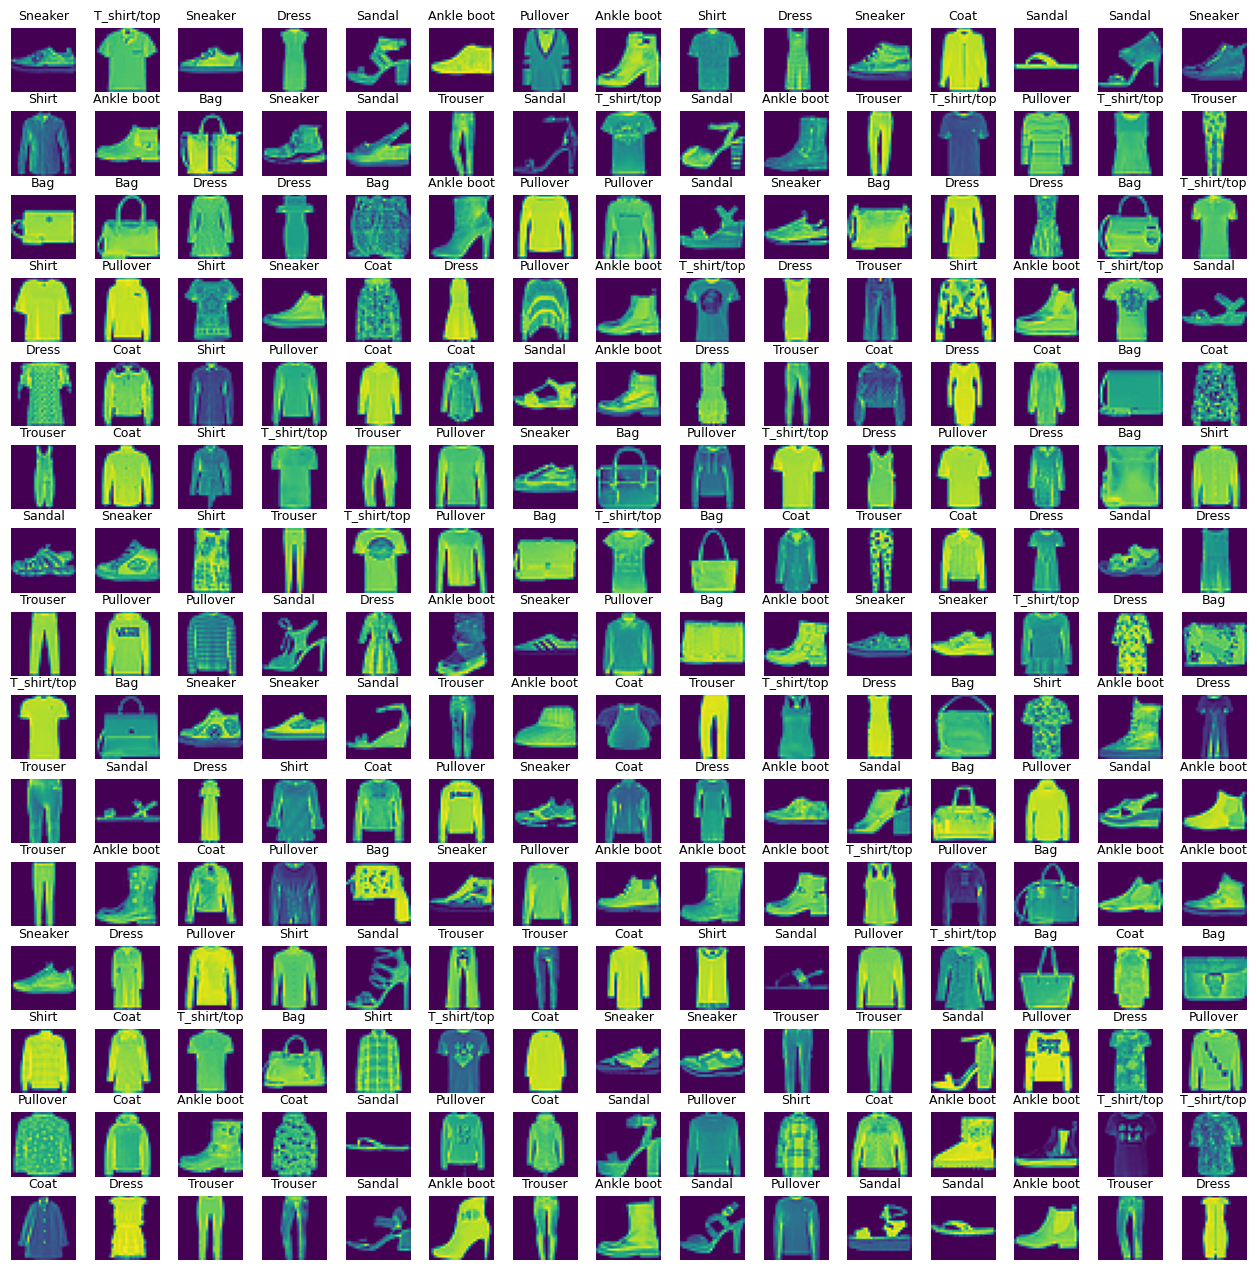

In [16]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [17]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [18]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [19]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [22]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer= Adam(learning_rate = 0.001),metrics =['accuracy'])

In [23]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.3196 - loss: 2.0216 - val_accuracy: 0.5798 - val_loss: 1.2663
Epoch 2/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.6425 - loss: 1.1029 - val_accuracy: 0.7626 - val_loss: 0.7523
Epoch 3/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.7658 - loss: 0.7062 - val_accuracy: 0.7863 - val_loss: 0.6145
Epoch 4/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.7877 - loss: 0.5982 - val_accuracy: 0.8092 - val_loss: 0.5422
Epoch 5/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8059 - loss: 0.5389 - val_accuracy: 0.8323 - val_loss: 0.4962
Epoch 6/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.8303 - loss: 0.4899 - val_accuracy: 0.8390 - val_loss: 0.4661
Epoch 7/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.8359 - loss: 0.4672 - val_accuracy: 0.8503 - val_loss: 0.4435
Epoch 8/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8461 - loss: 0.4438 - val_accuracy: 0.8559 - val_loss:

Text(0.5, 1.0, 'Train - Accuracy')

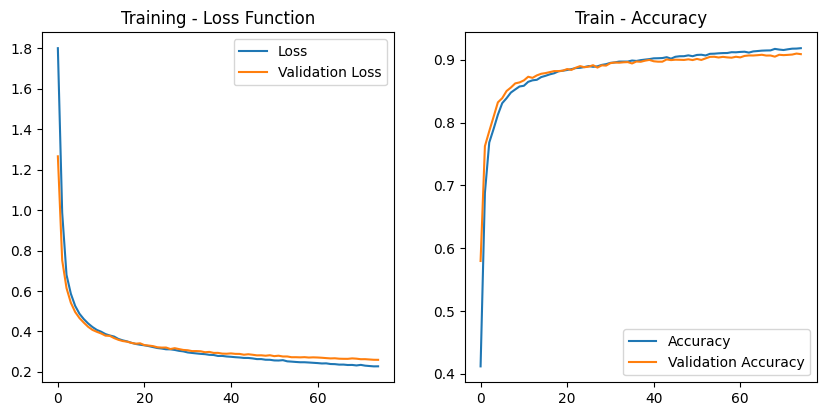

In [32]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [33]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2766
Test Accuracy : 0.8992


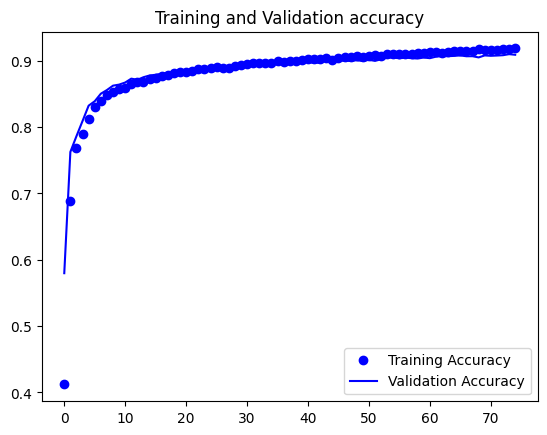

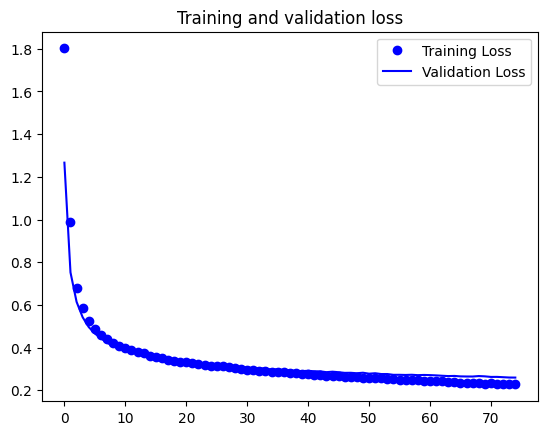

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import classification_report
predictions = cnn_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
#Get the predictions for the test data
# predicted_classes = cnn_model.predict(x_test)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.84      0.84      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.83      0.84      0.84      1000
     Class 3       0.91      0.89      0.90      1000
     Class 4       0.83      0.88      0.85      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.74      0.70      0.72      1000
     Class 7       0.95      0.96      0.95      1000
     Class 8       0.97      0.98      0.97      1000
     Class 9       0.96      0.96      0.96       999

    accuracy                           0.90      9999
   macro avg       0.90      0.90      0.90      9999
weighted avg       0.90      0.90      0.90      9999



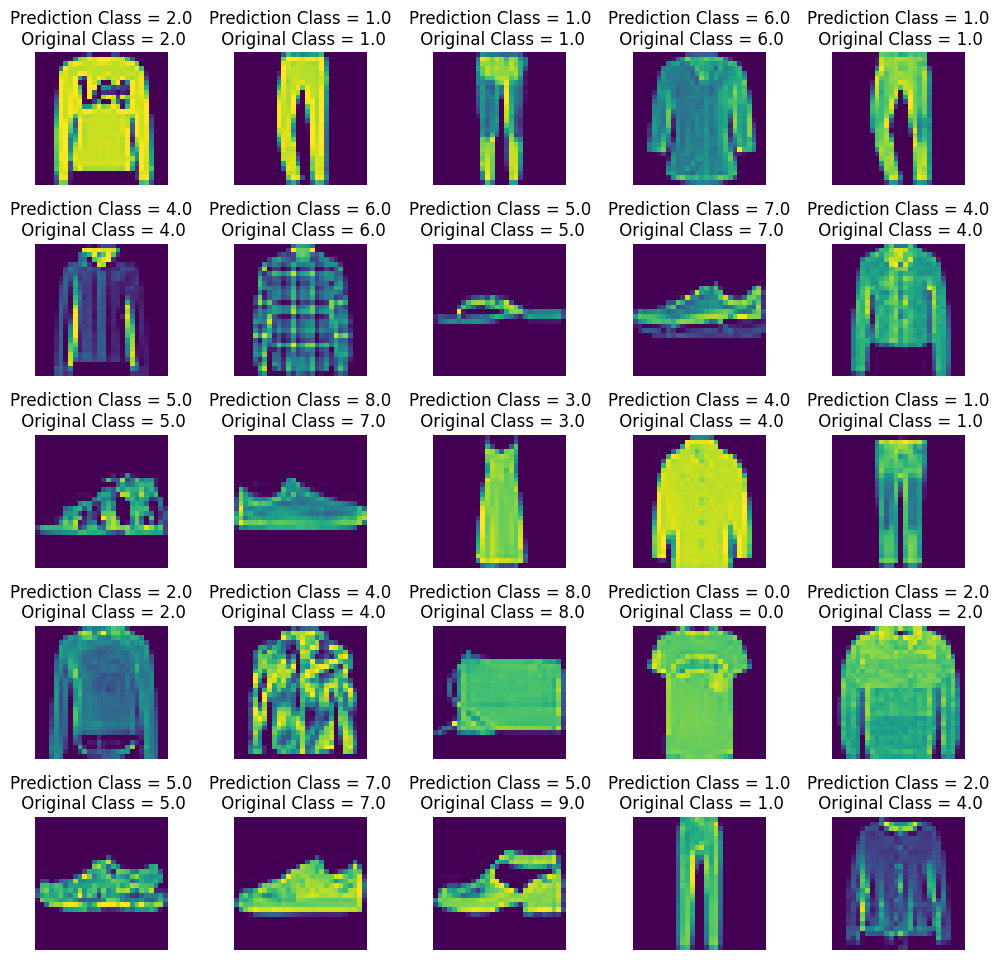

In [42]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)